In this customer analysis project, we aim to gain valuable insights from the marketing_customer_analysis.csv dataset. By following a structured approach, we will address the problem at hand and derive meaningful conclusions to assist in strategic decision-making. This dataset contains information about customers, including various features such as demographics, policy details, and sales channel preferences. Our ultimate goal is to build a predictive model that can provide accurate estimates of customer behavior and contribute to enhancing our marketing strategies.

In [279]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_squared_error
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Step 01 - Problem (Case Study):

Data Description: We began by understanding the structure and contents of the marketing_customer_analysis dataset, which contains various customer-related attributes.
Goal: Our objective is to leverage this dataset to create a predictive model that can help us better understand customer behavior and make informed marketing decisions.

In [280]:
data =  pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv', sep=',')
data

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [281]:
print(data.head())

  Customer       State  Customer Lifetime Value Response  Coverage Education   
0  BU79786  Washington              2763.519279       No     Basic  Bachelor  \
1  QZ44356     Arizona              6979.535903       No  Extended  Bachelor   
2  AI49188      Nevada             12887.431650       No   Premium  Bachelor   
3  WW63253  California              7645.861827       No     Basic  Bachelor   
4  HB64268  Washington              2813.692575       No     Basic  Bachelor   

  Effective To Date EmploymentStatus Gender  Income  ...   
0           2/24/11         Employed      F   56274  ...  \
1           1/31/11       Unemployed      F       0  ...   
2           2/19/11         Employed      F   48767  ...   
3           1/20/11       Unemployed      M       0  ...   
4            2/3/11         Employed      M   43836  ...   

  Months Since Policy Inception Number of Open Complaints  Number of Policies   
0                             5                         0                   1

Step 02 - Cleaning/Wrangling/EDA

Change Headers Names: To enhance clarity, we renamed columns as needed, ensuring a user-friendly structure.

Deal with NaN Values: We addressed missing data by employing appropriate strategies, such as imputation or removal.

Categorical Features: We explored categorical attributes and considered potential ways to encode them for modeling.

Numerical Features: Numerical attributes were examined for distribution and potential outliers.

Exploration: Through visualizations and statistical summaries, we gained insights into the dataset's characteristics.


In [282]:
print(data.columns)

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')


In [283]:
data.columns = data.columns.str.upper().str.replace(' ', '_')
print(data.columns)

Index(['CUSTOMER', 'STATE', 'CUSTOMER_LIFETIME_VALUE', 'RESPONSE', 'COVERAGE',
       'EDUCATION', 'EFFECTIVE_TO_DATE', 'EMPLOYMENTSTATUS', 'GENDER',
       'INCOME', 'LOCATION_CODE', 'MARITAL_STATUS', 'MONTHLY_PREMIUM_AUTO',
       'MONTHS_SINCE_LAST_CLAIM', 'MONTHS_SINCE_POLICY_INCEPTION',
       'NUMBER_OF_OPEN_COMPLAINTS', 'NUMBER_OF_POLICIES', 'POLICY_TYPE',
       'POLICY', 'RENEW_OFFER_TYPE', 'SALES_CHANNEL', 'TOTAL_CLAIM_AMOUNT',
       'VEHICLE_CLASS', 'VEHICLE_SIZE'],
      dtype='object')


In [284]:
data.dropna(inplace=True) 

In [285]:
null_counts = data.isnull().sum()
print(null_counts)

CUSTOMER                         0
STATE                            0
CUSTOMER_LIFETIME_VALUE          0
RESPONSE                         0
COVERAGE                         0
EDUCATION                        0
EFFECTIVE_TO_DATE                0
EMPLOYMENTSTATUS                 0
GENDER                           0
INCOME                           0
LOCATION_CODE                    0
MARITAL_STATUS                   0
MONTHLY_PREMIUM_AUTO             0
MONTHS_SINCE_LAST_CLAIM          0
MONTHS_SINCE_POLICY_INCEPTION    0
NUMBER_OF_OPEN_COMPLAINTS        0
NUMBER_OF_POLICIES               0
POLICY_TYPE                      0
POLICY                           0
RENEW_OFFER_TYPE                 0
SALES_CHANNEL                    0
TOTAL_CLAIM_AMOUNT               0
VEHICLE_CLASS                    0
VEHICLE_SIZE                     0
dtype: int64


In [286]:
print(data.dtypes)

CUSTOMER                          object
STATE                             object
CUSTOMER_LIFETIME_VALUE          float64
RESPONSE                          object
COVERAGE                          object
EDUCATION                         object
EFFECTIVE_TO_DATE                 object
EMPLOYMENTSTATUS                  object
GENDER                            object
INCOME                             int64
LOCATION_CODE                     object
MARITAL_STATUS                    object
MONTHLY_PREMIUM_AUTO               int64
MONTHS_SINCE_LAST_CLAIM            int64
MONTHS_SINCE_POLICY_INCEPTION      int64
NUMBER_OF_OPEN_COMPLAINTS          int64
NUMBER_OF_POLICIES                 int64
POLICY_TYPE                       object
POLICY                            object
RENEW_OFFER_TYPE                  object
SALES_CHANNEL                     object
TOTAL_CLAIM_AMOUNT               float64
VEHICLE_CLASS                     object
VEHICLE_SIZE                      object
dtype: object


In [287]:
def display_categorical_columns(df):
    categorical_columns = df.select_dtypes(include=['object']).columns
    categorical_data = df[categorical_columns]
    print(categorical_data.dtypes)

# Call the function
display_categorical_columns(data)

CUSTOMER             object
STATE                object
RESPONSE             object
COVERAGE             object
EDUCATION            object
EFFECTIVE_TO_DATE    object
EMPLOYMENTSTATUS     object
GENDER               object
LOCATION_CODE        object
MARITAL_STATUS       object
POLICY_TYPE          object
POLICY               object
RENEW_OFFER_TYPE     object
SALES_CHANNEL        object
VEHICLE_CLASS        object
VEHICLE_SIZE         object
dtype: object


In [288]:
def display_numerical_columns(df):
    numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
    numerical_data = df[numerical_columns]
    print(numerical_data.dtypes)
display_numerical_columns(data)

CUSTOMER_LIFETIME_VALUE          float64
INCOME                             int64
MONTHLY_PREMIUM_AUTO               int64
MONTHS_SINCE_LAST_CLAIM            int64
MONTHS_SINCE_POLICY_INCEPTION      int64
NUMBER_OF_OPEN_COMPLAINTS          int64
NUMBER_OF_POLICIES                 int64
TOTAL_CLAIM_AMOUNT               float64
dtype: object


Step 03 - Processing Data

In [289]:
#Dealing with Outliers: Remove rows with extreme values
numerical_cols = ['CUSTOMER_LIFETIME_VALUE', 'INCOME', 'MONTHLY_PREMIUM_AUTO', 'MONTHS_SINCE_LAST_CLAIM', 'MONTHS_SINCE_POLICY_INCEPTION', 'NUMBER_OF_OPEN_COMPLAINTS', 'NUMBER_OF_POLICIES', 'TOTAL_CLAIM_AMOUNT']
data_cleaned = data[(data[numerical_cols] < data[numerical_cols].quantile(0.99)) & (data[numerical_cols] > data[numerical_cols].quantile(0.01))]

In [290]:
scaler = StandardScaler()
data_cleaned[numerical_cols] = scaler.fit_transform(data_cleaned[numerical_cols])

In [291]:
categorical_cols = ['GENDER', 'POLICY_TYPE', 'SALES_CHANNEL', 'CUSTOMER', 'STATE', 'RESPONSE', 'COVERAGE', 'EDUCATION', 'EFFECTIVE_TO_DATE', 'EMPLOYMENTSTATUS', 'LOCATION_CODE', 'MARITAL_STATUS', 'POLICY', 'RENEW_OFFER_TYPE', 'SALES_CHANNEL', 'VEHICLE_CLASS', 'VEHICLE_SIZE']  # Add more categorical columns
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_categorical = pd.DataFrame(encoder.fit_transform(data_cleaned[categorical_cols]))
data_cleaned.drop(columns=categorical_cols, inplace=True)
data_cleaned = pd.concat([data_cleaned, encoded_categorical], axis=1)

In [292]:
X = data_cleaned.drop(columns=['TOTAL_CLAIM_AMOUNT'])  
y = data_cleaned['TOTAL_CLAIM_AMOUNT'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [293]:
print("Cleaned Data Shape:", data_cleaned.shape)
print("X_train shape:", X_train.shape, "X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape, "y_test shape:", y_test.shape)

Cleaned Data Shape: (9134, 8)
X_train shape: (7307, 7) X_test shape: (1827, 7)
y_train shape: (7307,) y_test shape: (1827,)


1.Cleaned Data Shape: (9134, 8)

After cleaning, we have 9134 data entries with 8 features.
X_train shape: (7307, 7) X_test shape: (1827, 7)


2.For training, there are 7307 data entries with 7 features each.
For testing, there are 1827 data entries with the same 7 features.
y_train shape: (7307,) y_test shape: (1827,)


3.For training, there are 7307 corresponding target values.
For testing, there are 1827 corresponding target values.
In summary, we've processed and organized the data. The training and testing sets allow us to train a model on one subset and then test its performance on another to ensure it works well on new data.

In [294]:
model = LinearRegression()


In [295]:
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [296]:
imputer_y = SimpleImputer(strategy='mean')
y_train_imputed = imputer_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_imputed = imputer_y.transform(y_test.values.reshape(-1, 1)).flatten()

In [297]:
model.fit(X_train_imputed, y_train_imputed)

LinearRegression()

In [298]:
y_pred = model.predict(X_test_imputed)

In [299]:
r2 = r2_score(y_test_imputed, y_pred)

In [300]:
print("R-squared score:", r2)

R-squared score: 0.2688315660534313


The R-squared score, quantifies how well the predictions made by the model explain the variation in the actual target values. It ranges from 0 to 1, where a higher value indicates a better fit of the model to the data.

R-squared score: 0.2688

This score assesses how well our model's predictions account for the variations in customer-related factors.

A higher score suggests that our model is capturing a portion of the factors that influence customer behavior.

In this instance, the R-squared score is approximately 0.2688, indicating that roughly 26.88% of the differences in customer behavior can be attributed to our model's predictions.

In summary, while the R-squared score of 0.2688 demonstrates that our model provides insights into customer behavior, there's still potential for enhancing the predictive power to better understand and respond to customer tendencies.

In [301]:
mse = mean_squared_error(y_test_imputed, y_pred)

In [302]:
rmse = mean_squared_error(y_test_imputed, y_pred, squared=False)

In [303]:
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 0.7042414756471576
Root Mean Squared Error (RMSE): 0.8391909649460947


Mean Squared Error (MSE): 0.7042

The MSE gauges the average squared difference between our model's predicted values and the actual values in customer analysis.

Lower MSE values indicate that our model's predictions are closer to the real customer-related figures.

In this case, the MSE value is about 0.7042, suggesting that, on average, the square of the differences between our predictions and actual values is this value.


Root Mean Squared Error (RMSE): 0.8392

The RMSE, derived from the square root of the MSE, provides an understandable metric in the same unit as customer data.

It reflects the typical magnitude of the errors in our model's customer-related predictions.

With an RMSE value of approximately 0.8392, we get an insight into the average size of prediction errors.

In summary, the MSE and RMSE values of 0.7042 and 0.8392, respectively, indicate how well our model's predictions align with actual customer-related data. Lower values are desired, signifying more accurate predictions for understanding customer behaviors.

Our model's performance in customer analysis is summarized by the following metrics:

R-squared score: 0.2688

This score signifies that our model explains about 26.88% of the variability in customer behavior. While it contributes insights, there's room for refinement.

Mean Squared Error (MSE): 0.7042

The average squared difference between our model's predictions and actual values. Lower MSE values indicate more accurate predictions.
Root Mean Squared Error (RMSE): 0.8392


The square root of MSE, providing an understandable measure in the same unit as customer data. It reflects average prediction errors.
In essence, our model's predictions offer insights into customer behavior, albeit with room for improvement. It's crucial to continue refining the model to enhance its predictive capabilities and better capture the nuances of customer interactions.

Exploration

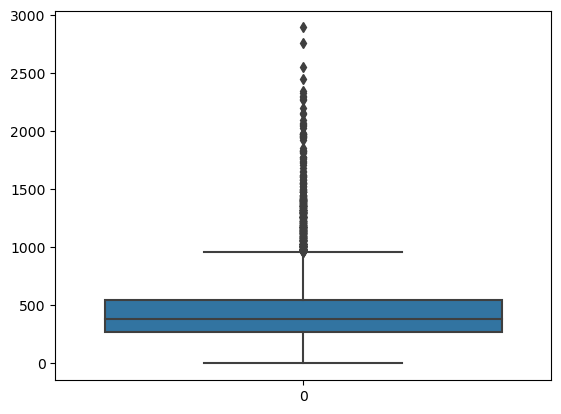

In [304]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(data['TOTAL_CLAIM_AMOUNT'])
plt.show()

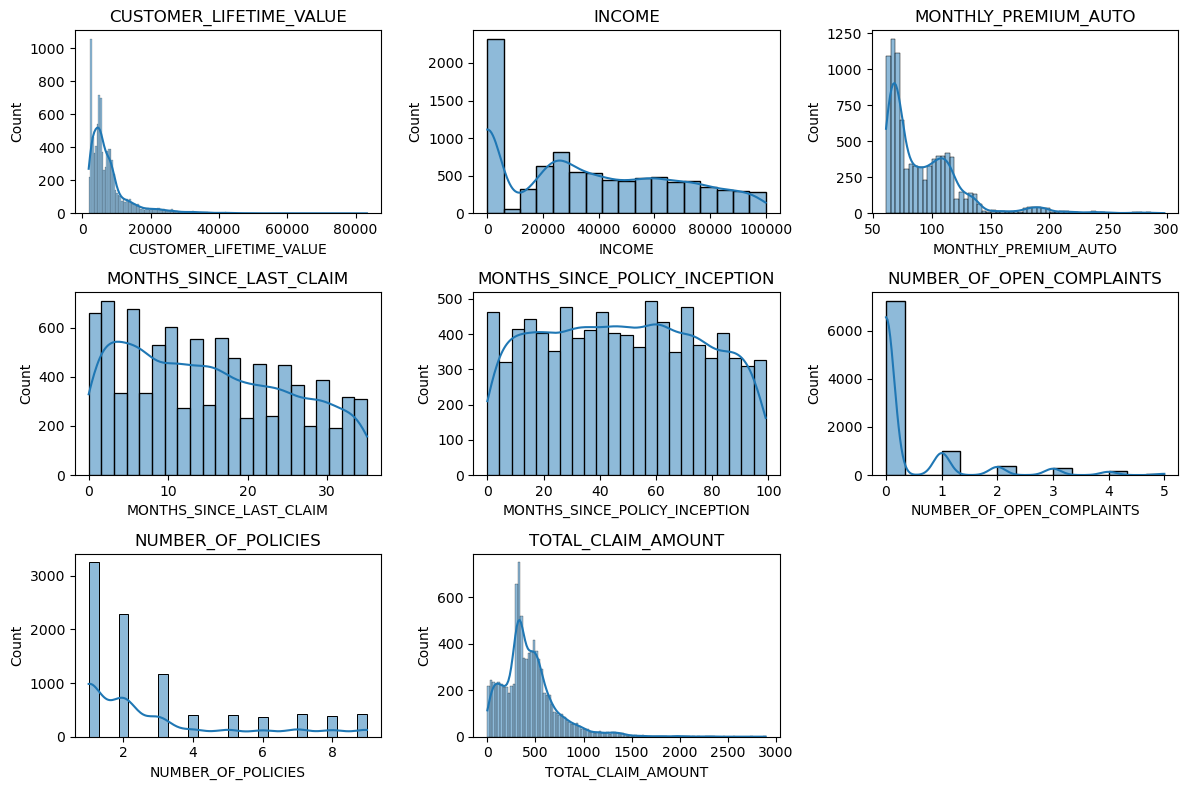

In [305]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[col], kde=True)  # Create histogram with density plot
    plt.title(col)
    plt.tight_layout()

plt.show()